In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def generate_dataset():
  dataset = make_classification(
    n_samples=20, n_features=1, n_repeated=0, n_redundant=0,  shift=30, 
    scale=10, n_classes=2, n_clusters_per_class=1, n_informative=1, 
    class_sep=1, random_state=1
  )
  df = pd.DataFrame(dataset[0])
  df = pd.concat([(np.ceil(df)).astype(int), pd.DataFrame(dataset[1])], axis=1)
  df.columns = ['Score', 'Admission']
  return df

data = generate_dataset()
data.head()

,Score,Admission
0,310,1
1,297,0
2,318,1
3,290,0
4,288,0


<Axes: xlabel='Score', ylabel='Admission'>

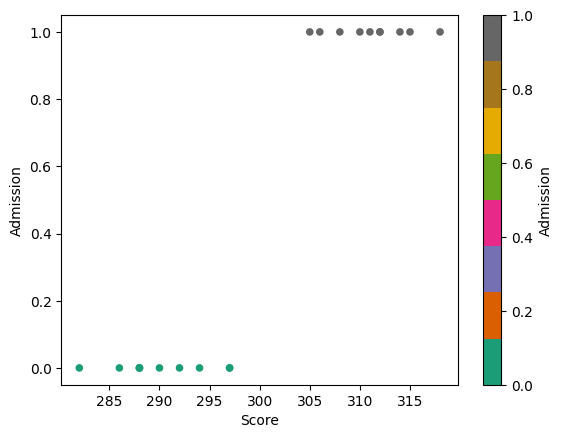

In [2]:
data.plot(kind = "scatter", x = "Score", y = "Admission", c = "Admission", cmap = "Dark2")

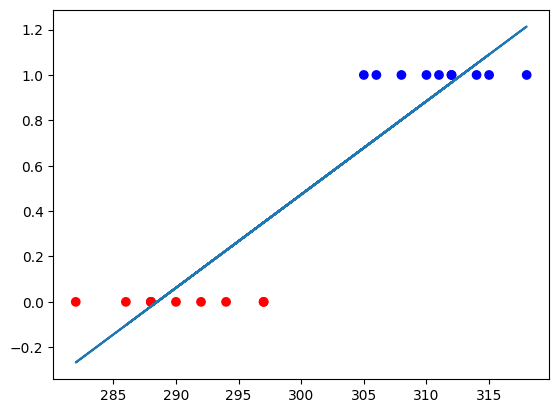

In [3]:
# Running Linear Regression
from sklearn.linear_model import LinearRegression

map_color = np.array(["r","b"])

x = data[["Score"]].to_numpy()
y = data[["Admission"]].to_numpy()

linearR = LinearRegression()
linearR.fit(x,y)

plt.scatter(x,y, c = map_color[y.flatten()])
plt.plot(x, linearR.predict(x))

plt.show()

# Logistic Regression

Let's recall the equation of **simple linear regression**:

$$
\hat{y} = \beta_0 + \beta_1 x
$$

where:  
- $\beta_0$ = intercept  
- $\beta_1$ = coefficient (slope)  
- $x$ = input feature  

---

## Logistic Regression Idea

In **logistic regression**, we do **not** use the linear regression output directly.  
Instead, we pass it through a function called the **sigmoid function**.

---

## Sigmoid Function

The sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where $z$ is any real number.

---

## Why Sigmoid?

- Converts any value into range **0 to 1**
- Output can be interpreted as **probability**
- Perfect for **binary classification (0 or 1)**

---

## Logistic Regression Equation

$$
z = \beta_0 + \beta_1 x
$$

$$
P(y=1|x) = \sigma(z)
$$

---

### ✅ Summary (Easy Words)

- Linear Regression → gives numbers  
- Sigmoid Function → converts numbers to probability  
- Logistic Regression → used for **classification**


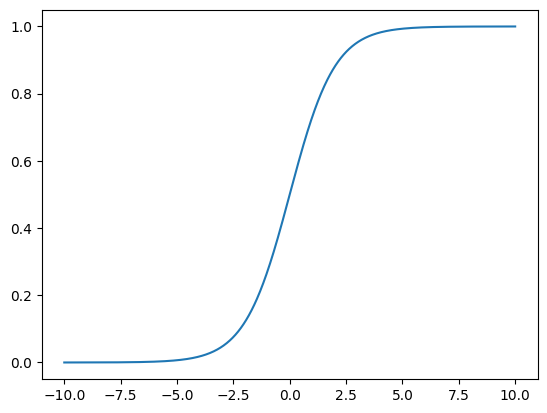

In [4]:
x = np.linspace(-10,10,1000)

sigmoid = lambda z: 1 / (1 + np.exp(-z))

plt.plot(x, sigmoid(x))


## Sigmoid Function and Probability Interpretation

The function $\sigma(z)$ maps any real number to the **[0, 1]** interval,  
making it useful for **classification**.

This function $\sigma(z)$ is also called:
- Logistic sigmoid function
- Logistic curve

---

## Logistic Regression Output

As discussed earlier, the input to the sigmoid function is:

$$
z = \beta_0 + \beta_1 x
$$

Let the output of logistic regression for a sample $x$ be $p(x)$.

Then,

$$
p(x) = \sigma(z) = \frac{1}{1 + e^{-z}} = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}
$$

---

## Probability Meaning

- $p(x)$ → Probability that the sample belongs to **Class 1**
- $1 - p(x)$ → Probability that the sample belongs to **Class 0**

---

## Model Parameters

From the above equations, we need to estimate the regression coefficients:
- $\beta_0$ (intercept)
- $\beta_1$ (weight)

The optimization process for estimating these coefficients is not discussed here.

Instead, we use **Scikit-Learn's** `LogisticRegression` model to compute them.


In [6]:
x = data[["Score"]].to_numpy()
y = data[["Admission"]].to_numpy()

linearR = LinearRegression()
linearR.fit(x,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
y_cap = linearR.predict(x)

In [8]:
sigmoid = lambda z: 1 / (1 + np.exp(-z))

In [9]:
prob_y = sigmoid(y_cap)

In [10]:
result = prob_y > 0.6 # threshold
result.astype(int).flatten()

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [11]:
y.flatten()

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])